In [1]:
print("radhe radhe")

radhe radhe


In [2]:
import pandas as pd
from regex import P

class TemperatureDataTransformer:
    def __init__(self, data):
        """
        Initialize the class with the wide-format data.
        """
        self.df_wide = pd.DataFrame(data)

    def wide_to_long(self):
        """
        Transform the wide-format data into long format.
        """
        df_long = self.df_wide.melt(id_vars=['Year'], var_name='Month', value_name='Temperature')
        df_long['Date'] = pd.to_datetime(df_long['Year'].astype(str) + '-' + df_long['Month'] + '-01')
        df_long = df_long.set_index('Date')[['Temperature']]
        df_long=df_long.sort_index()
        return df_long

    def long_to_wide(self, df_long,col):
        """
        Transform the long-format data back into wide format.
        """
        df_long = df_long.reset_index()
        
        # print(df_long)
        df_long['Year'] = df_long['Date'].dt.year
        # print(df_long['Year'])
        df_long['Index'] = df_long['Date'].dt.month_name().str[:3]
        # print(df_long['Index'])
        df_wide = df_long.pivot(index='Year', columns='Index', values=col)
        # print(df_wide)
        # Reorder columns to match the original format
        month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        df_wide = df_wide[month_order]
        # print(df_wide)
        # print(df_wide.reset_index())
        return df_wide.reset_index()


In [3]:
from dotenv import load_dotenv
import os

load_dotenv()

# IMPORT DATASET PATH
DATASET_PATH= os.getenv("DATASET_PATH")
import pandas as pd
df=pd.read_csv(DATASET_PATH,index_col="Date",parse_dates=["Date"],dayfirst=False)

import datetime
from dateutil.relativedelta import relativedelta  # Import relativedelta

# Define the train end date
# Define the train end date
# train_end_date = datetime.datetime(1997, 12, 1)
train_end_date = datetime.datetime(1992, 12, 1)

# Calculate the test start date by adding 1 month
test_start = train_end_date + relativedelta(months=1)
train_data=df[:train_end_date]
test_data=df[test_start:]

In [4]:
train_data.head()

,Bankura_temp,Birbhum_temp,Burdwan_temp,Darjeeling_temp,Hooghly_temp,Howrah_temp,Jalpaiguri_temp,Kochbihar_temp,Kolkata_temp,Malda_temp,Medinipur_temp,Murshidabad_temp,Nadia_temp,North-24-Parganas_temp,North-Dinajpur_temp,Purulia_temp,South-24-Parganas_temp,South-Dinajpur_temp
Date,,,,,,,,,,,,,,,,,,
1901-01-01,17.970,17.405,18.108,14.058,18.897,19.161,15.593,15.917,19.106,15.670,18.889,17.540,18.428,18.522,15.151,17.159,15.968,16.580
1901-02-01,21.334,21.435,21.879,16.913,22.437,22.497,18.650,19.243,22.600,19.754,21.892,21.501,22.215,21.830,18.845,20.297,18.558,20.409
1901-03-01,26.523,26.422,26.913,21.394,27.463,27.343,23.034,23.535,27.495,24.729,26.686,26.360,26.938,26.097,23.732,25.467,22.129,25.228
1901-04-01,31.712,31.807,31.968,25.806,31.886,31.445,27.258,27.823,31.686,30.027,30.972,31.581,31.725,29.794,28.800,30.974,25.039,30.325
1901-05-01,32.202,31.714,31.934,26.155,31.622,31.316,27.323,27.809,31.392,29.840,31.223,31.243,31.368,29.616,28.859,32.114,25.069,29.959


In [5]:
test_data.head()

,Bankura_temp,Birbhum_temp,Burdwan_temp,Darjeeling_temp,Hooghly_temp,Howrah_temp,Jalpaiguri_temp,Kochbihar_temp,Kolkata_temp,Malda_temp,Medinipur_temp,Murshidabad_temp,Nadia_temp,North-24-Parganas_temp,North-Dinajpur_temp,Purulia_temp,South-24-Parganas_temp,South-Dinajpur_temp
Date,,,,,,,,,,,,,,,,,,
1993-01-01,19.656,18.982,19.632,16.027,20.314,20.506,17.719,17.863,20.502,17.088,20.159,18.836,19.617,19.729,16.659,19.059,16.959,17.805
1993-02-01,22.851,22.964,23.332,18.761,23.737,23.721,20.378,20.968,23.897,21.511,23.040,23.027,23.597,23.024,20.609,22.029,19.443,22.121
1993-03-01,26.131,25.865,26.319,20.344,26.700,26.536,21.938,22.434,26.693,23.838,26.021,25.594,26.154,25.256,22.730,25.402,21.395,24.140
1993-04-01,29.796,29.688,29.814,24.184,29.613,29.167,25.548,26.001,29.288,27.862,28.983,29.379,29.452,27.654,26.739,29.514,23.188,28.127
1993-05-01,31.958,31.063,31.307,25.502,30.873,30.491,26.606,26.856,30.589,28.573,30.520,30.137,30.225,28.711,27.689,32.258,24.291,28.382


In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline  

In [7]:
import os
import pandas as pd

data_path = "/home/radhe/Subha/internship/werather_forcastiing/output2"
data = {}

for root, dirs, files in os.walk(data_path):
    for f in files:
        if f.endswith('.csv'):
            path = os.path.join(root, f)
            print(path,f.removesuffix(".csv"))
            df = pd.read_csv(path,index_col="Date",parse_dates=["Date"],dayfirst=False)
            data[f.removesuffix(".csv")] = df  


/home/radhe/Subha/internship/werather_forcastiing/output2/rolling_predictions_window_12.csv rolling_predictions_window_12
/home/radhe/Subha/internship/werather_forcastiing/output2/predict_result_no_mod.csv predict_result_no_mod
/home/radhe/Subha/internship/werather_forcastiing/output2/rolling_predictions_window_1.csv rolling_predictions_window_1
/home/radhe/Subha/internship/werather_forcastiing/output2/sarima_result_exog_pred.csv sarima_result_exog_pred
/home/radhe/Subha/internship/werather_forcastiing/output2/lstm_pred_data.csv lstm_pred_data


In [8]:
rolling_predictions_window_12=data["rolling_predictions_window_12"]
sarima_no_mod=data["predict_result_no_mod"]
rolling_predictions_window_1=data["rolling_predictions_window_1"]
sarima_result_exog_pred=data["sarima_result_exog_pred"]
lstm_pred_data=data["lstm_pred_data"]
# all_disticts=data["all_disticts"]




In [9]:
# from sklearn.metrics import r2_score
from sympy import im

def r2_score(y_true, y_pred):
    # manually calculate R2 score
    ss_res = ((y_true - y_pred) ** 2).sum()
    ss_tot = ((y_true - y_true.mean()) ** 2).sum()
    r2 = 1 - (ss_res / ss_tot)
    return r2

def find_r2(y_true, y_pred):
    r2_val={}
    for col in y_true:
        r2_val[col]=r2_score(y_true[col], y_pred[col])
    return r2_val

for col in test_data.columns:
    tem=TemperatureDataTransformer(test_data)
    f1=tem.long_to_wide(test_data[col],col)
    f1.drop(columns=["Year"],inplace=True)
    tem=TemperatureDataTransformer(lstm_pred_data)
    f2=tem.long_to_wide(lstm_pred_data[col],col)
    f2.drop(columns=["Year"],inplace=True)
    
    r2=find_r2(f1,f2)
    print(f"R2 score for:- {col}:")
    print(r2)
    break
    

R2 score for:- Bankura_temp:
{'Jan': -0.8320347740301948, 'Feb': -6.513462185018718, 'Mar': -3.781603852980516, 'Apr': -0.3559449726310373, 'May': -3.2239088177390958, 'Jun': -0.13826284819961066, 'Jul': -0.27791084812271905, 'Aug': -2.809013122897754, 'Sep': -1.0432292084776122, 'Oct': -3.7656723204029214, 'Nov': -4.425808733511715, 'Dec': -5.588223571243409}


In [10]:
# r2=find_r2(test_data,rolling_predictions_window_1)
# print(r2)

In [11]:
rolling_predictions_window_12=data["rolling_predictions_window_12"]
sarima_no_mod=data["predict_result_no_mod"]
rolling_predictions_window_1=data["rolling_predictions_window_1"]
sarima_result_exog_pred=data["sarima_result_exog_pred"]
lstm_pred_data=data["lstm_pred_data"]

In [12]:
models = {
    "rolling_predictions_window_12": rolling_predictions_window_12,
    "sarima_no_mod": sarima_no_mod,
    "rolling_predictions_window_1": rolling_predictions_window_1,
    "sarima_result_exog_pred": sarima_result_exog_pred,
    "lstm_pred_data": lstm_pred_data
}

In [13]:
test_data_len=len(test_data)/12
test_data_len=int(test_data_len)
test_data_len

10

In [14]:
import numpy as np
# from sklearn.metrics import mean_squared_error


def mean_squared_error(y_true, y_pred):
    """
    Calculate the mean squared error between two sets of predictions.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

def root_mean_squared_error(y_true, y_pred):
    """
    Calculate the root mean squared error between two sets of predictions.
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

def find_rmse(y_true, y_pred):
    r2_val={}
    for col in y_true:
        r2_val[col]=root_mean_squared_error(y_true[col], y_pred[col])
    return r2_val
rmse_value_months={}
for model_name, model_data in models.items():
    print(f"Model: {model_name}")
    rmse_months={}
    for col in test_data.columns:
        tem=TemperatureDataTransformer(test_data)
        f1=tem.long_to_wide(test_data[col],col)
        f1.drop(columns=["Year"], inplace=True)
        tem=TemperatureDataTransformer(model_data)
        f2=tem.long_to_wide(model_data[col],col)
        f2.drop(columns=["Year"], inplace=True)
        rmse = find_rmse(f1, f2)
        rmse_months[col]=rmse
    rmse_value_months[model_name]=rmse_months
    
# print(rmse_value_months)
import json
rmse_path = os.path.join(data_path, "rmse_value_months.json")
with open(rmse_path, "w") as f:
    json.dump(rmse_value_months, f, indent=4)

with open(rmse_path, "r") as f:
    models_rmse = json.load(f)
    # print(models_rmse)    

Model: rolling_predictions_window_12
Model: sarima_no_mod
Model: rolling_predictions_window_1
Model: sarima_result_exog_pred
Model: lstm_pred_data


## Month wise analysis and plotting

In [30]:
X_axix= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
models_month_rmse= {}
for model_name, model_data in models_rmse.items():
    print(f"Model: {model_name}")
    x_rmse = {}
    for x in X_axix:
        sum = 0
        denom = 0
        for month, rmse_value in model_data.items():
            # print(f"Month: {month}")
            # print(mse_value[x])
            """"
            result_rmse= srt((rmse1^2* test_data_len + rmse2^2* test_data_len + rmse3^2* test_data_len)/test_data_len+test_data_len+test_data_len
            """
            sum += (rmse_value[x]**2)*test_data_len 
            denom+= test_data_len
        x_rmse[x] = (sum/denom)**0.5   
    models_month_rmse[model_name] = x_rmse    
print(models_month_rmse)

Model: rolling_predictions_window_12
Model: sarima_no_mod
Model: rolling_predictions_window_1
Model: sarima_result_exog_pred
Model: lstm_pred_data
{'rolling_predictions_window_12': {'Jan': 0.7103716753899818, 'Feb': 0.8645977540197879, 'Mar': 0.8422107363353042, 'Apr': 1.0426492119368065, 'May': 0.6616803054814886, 'Jun': 0.7141908808050924, 'Jul': 0.3928303236538591, 'Aug': 0.3616638024743447, 'Sep': 0.4079406361264956, 'Oct': 0.6483876406538034, 'Nov': 0.7787218569003271, 'Dec': 0.6775971418170511}, 'sarima_no_mod': {'Jan': 0.7314244669217941, 'Feb': 0.8802697526271972, 'Mar': 0.8647382360464536, 'Apr': 1.0656274854398005, 'May': 0.6733150414755653, 'Jun': 0.7362787506774274, 'Jul': 0.4023638105424937, 'Aug': 0.3721436026945491, 'Sep': 0.42047171373449194, 'Oct': 0.6570379959293356, 'Nov': 0.8025765986685852, 'Dec': 0.6935005380738404}, 'rolling_predictions_window_1': {'Jan': 0.6875857307964366, 'Feb': 0.8516132679429612, 'Mar': 0.8871580945251938, 'Apr': 1.0269799623215439, 'May': 0

In [31]:
models_month_rmse= pd.DataFrame(models_month_rmse)

In [32]:
models_month_rmse

,rolling_predictions_window_12,sarima_no_mod,rolling_predictions_window_1,sarima_result_exog_pred,lstm_pred_data
Jan,0.710372,0.731424,0.687586,0.735078,0.774770
Feb,0.864598,0.880270,0.851613,0.881839,1.290160
Mar,0.842211,0.864738,0.887158,0.867950,1.288605
Apr,1.042649,1.065627,1.026980,1.067747,1.113420
May,0.661680,0.673315,0.702228,0.676157,0.838919
Jun,0.714191,0.736279,0.773682,0.737731,0.816173
Jul,0.392830,0.402364,0.396743,0.408018,0.596587
Aug,0.361664,0.372144,0.420676,0.378813,0.587334
Sep,0.407941,0.420472,0.430680,0.424354,0.612861
Oct,0.648388,0.657038,0.600426,0.658017,0.784222


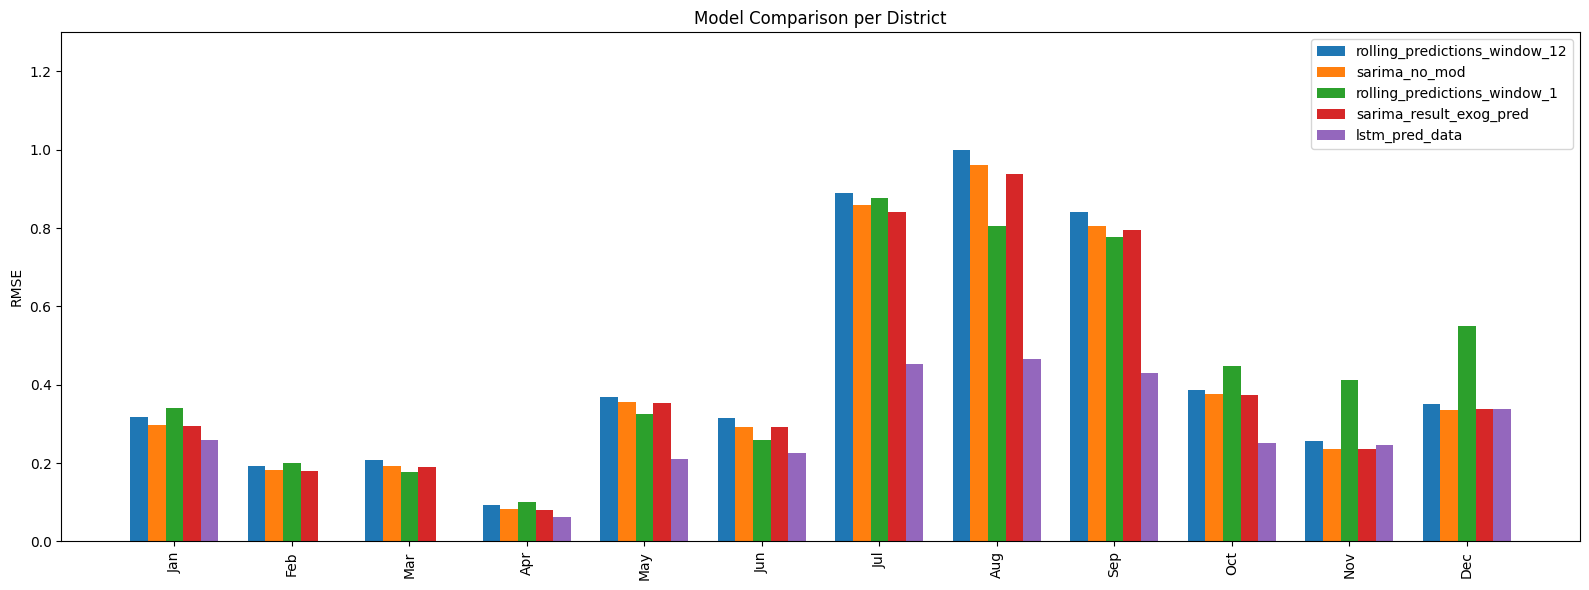

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming your data is loaded into a DataFrame called df
# If you haven't loaded it yet, load using:
# df = pd.read_csv("your_file.csv", index_col=0)

# Transpose for better plotting
df = models_month_rmse # Columns become models, rows become districts
df = 1/df  # Invert the values for better visualization (if needed)

df = (df - df.min().min()) / (df.max().max() - df.min().min())

# Plotting
x = np.arange(len(df.index))  # Number of districts
width = 0.15  # Width of each bar
models = df.columns

plt.figure(figsize=(16, 6))

# Create bar for each model
for i, model in enumerate(models):
    plt.bar(x + i * width, df[model], width=width, label=model)

plt.xticks(x + width * 2, df.index, rotation=90)
plt.ylabel('RMSE')
plt.title('Model Comparison per District')
plt.ylim(0, 1.3)
plt.legend()
plt.tight_layout()
plt.show()
